# Lista 1

### Maria Nowacka 275981

## zadanie 1
Instalacja i konfiguracja środowiska: Utwórz wirtualne środowisko
dla kursu. Zainstaluj niezbędne biblioteki: `pandas`, `numpy`, `scikit-learn`,
`matplotlib`.

In [7]:
# stworzenie środowiska -> zrobione w terminalu

## zadanie 2
Wczytanie i eksploracja danych: Wczytaj publicznie dostępny zbiór
danych `Iris` z biblioteki `scikit-learn` lub bezpośrednio z adresu
URL. Wyświetl pierwsze kilka wierszy i podstawowe informacje o zbiorze (`df.info()`, `df.describe()`).

In [1]:
import random
import sklearn, numpy as np, matplotlib.pyplot as plt, pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## zadanie 3

Obsługa brakujących wartości: Wczytaj zbiór danych `Titanic` (dostępny na Kaggle). Sprawdź, które kolumny zawierają brakujące wartości. Zaproponuj i zaimplementuj dwie różne strategie ich uzupełniania.

In [27]:
titanic = pd.read_csv("/Users/marysia/ml_env/Titanic-Dataset.csv")

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df = titanic.copy()
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df['Embarked'] = df['Embarked'].fillna('Unknown')
df['Cabin'] = df['Cabin'].fillna(random.choice(df['Cabin'].unique()))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## zadanie 4

Przetwarzanie danych kategorialnych: Wykorzystaj kolumny kategorialne (np. płeć, port zaokrętowania) ze zbioru Titanic. Przekształć je na format numeryczny, używając techniki *One-Hot Encoding*
z biblioteki pandas (`pd.get dummies())` oraz `scikit-learn`.

In [32]:
dft = pd.get_dummies(titanic, columns = ["Sex", "Embarked"])

In [33]:
dft.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


Jedna kolumna nienumeryczna

In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(titanic[['Embarked']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Embarked']))
t = pd.concat([titanic.drop(columns=['Embarked']), encoded_df], axis=1)
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0


Wiecej kolumn nienumerycznych

In [35]:
# cat_cols = titanic.select_dtypes(include=['object', 'category']).columns
cat_cols = ["Sex", "Embarked"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(titanic[cat_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))
t2 = pd.concat([titanic.drop(columns=cat_cols), encoded_df], axis=1)
t2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0,0.0


## zadanie 5
Skalowanie danych numerycznych: Wybierz kolumny numeryczne
ze zbioru `Iris` (np. długość i szerokość płatka). Zastosuj dwie różne
metody skalowania:

• **Standaryzacja (StandardScaler)**: Przekształć dane tak, aby
miały średnią 0 i odchylenie standardowe 1.

• **Normalizacja (MinMaxScaler)**: Przekształć dane tak, aby ich
wartości mieściły się w zakresie od 0 do 1.

Zwizualizuj dane przed i po skalowaniu za pomocą wykresu punktowego.

In [36]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = pd.DataFrame(df[['petal length (cm)', 'petal width (cm)']])

In [37]:
standard = StandardScaler()
minmax = MinMaxScaler()

standarized = standard.fit(X)
S = pd.DataFrame(standard.transform(X))
normalized = minmax.fit(X)
N = pd.DataFrame(normalized.transform(X))

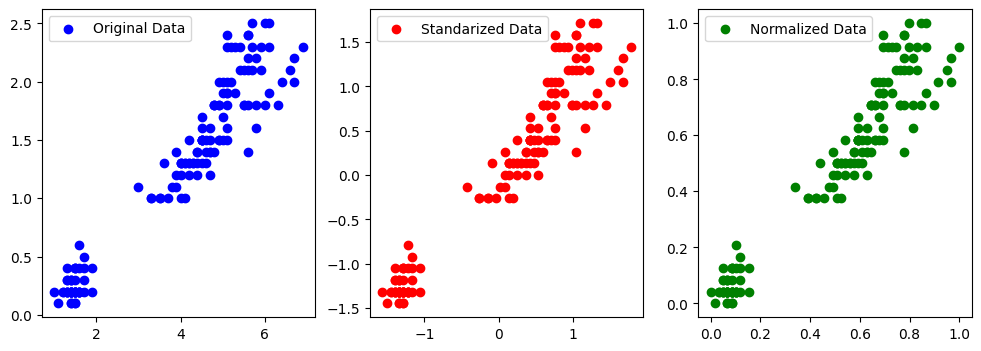

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color = "blue", label = "Original Data")
plt.legend()
plt.subplot(1, 3, 2)
plt.scatter(S[0], S[1], color = "red", label = "Standarized Data")
plt.legend()
plt.subplot(1, 3, 3)
plt.scatter(N[0], N[1], color = "green", label = "Normalized Data")
plt.legend()
plt.show()

## zadanie 6

Podział zbioru danych: Dokonaj podziału zbioru Iris na zbiór treningowy (70%) i testowy (30%) za pomocą funkcji `train test split`
z biblioteki `scikit-learn`. Sprawdź wymiary powstałych zbiorów.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train, test = train_test_split(df, train_size=0.7, test_size=0.3)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 90 to 133
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  105 non-null    float64
 1   sepal width (cm)   105 non-null    float64
 2   petal length (cm)  105 non-null    float64
 3   petal width (cm)   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 142 to 130
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  45 non-null     float64
 1   sepal width (cm)   45 non-null     float64
 2   petal length (cm)  45 non-null     float64
 3   petal width (cm)   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


In [43]:
len(train), len(test)

(105, 45)

## zadanie 7

Przygotowanie danych do modelowania: Wybierz dowolny zbiór
danych i przeprowadź pełny proces przygotowania danych: wczytanie,
obsługa brakujących wartości, przetwarzanie danych kategorialnych i
skalowanie danych numerycznych. Zapisz przygotowany zbiór do pliku.

In [44]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='titanic', version=1).frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [45]:
na_cols = ['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
num_na = ['age', 'fare', 'body']
cat_na = ['cabin', 'embarked', 'home.dest', 'boat']
for col in na_cols:
    if col in num_na:
        data[col] = data[col].fillna(data[col].median())
    else:
        if col in cat_na:
            data[col] = data[col].fillna(data[col].mode()[0])
cat_cols_all = data.select_dtypes(include=['object', 'category']).columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1309 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1309 non-null   float64 
 9   cabin      1309 non-null   object  
 10  embarked   1309 non-null   category
 11  boat       1309 non-null   object  
 12  body       1309 non-null   float64 
 13  home.dest  1309 non-null   object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [25]:
dummies = []
for col in cat_cols_all:
    if data[col].nunique()<=3:
        dummies.append(col)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(data[dummies])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(dummies))
data_smart = pd.concat([data.drop(columns=dummies), encoded_df], axis=1)
data_smart.head()

,pclass,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,survived_0,survived_1,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,155.0,"St Louis, MO",0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,155.0,"Montreal, PQ / Chesterville, ON",0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,13,155.0,"Montreal, PQ / Chesterville, ON",1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,13,135.0,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,13,155.0,"Montreal, PQ / Chesterville, ON",1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
T = pd.DataFrame(data[['body', 'fare']])
standarized = standard.fit(T)
TS = pd.DataFrame(standard.transform(T))
normalized = minmax.fit(TS)
TN = pd.DataFrame(normalized.transform(TS))
data['body'], data['fare'] = TN[0], TN[1]
data.to_csv('transformed_data.csv', index=False)